In [0]:
from keras.datasets import cifar10

import numpy as np
import keras
import tensorflow as tf

from sklearn.model_selection import train_test_split
from keras.layers.normalization import BatchNormalization

random_state = 42

Using TensorFlow backend.


In [0]:
(cifar_X_1, cifar_y_1), (cifar_X_2, cifar_y_2) = cifar10.load_data()

cifar_X = np.r_[cifar_X_1, cifar_X_2]
cifar_y = np.r_[cifar_y_1, cifar_y_2]

cifar_X = cifar_X.astype('float32') / 255
cifar_y = np.eye(10)[cifar_y.astype('int32').flatten()]

train_X, test_X, train_y, test_y = train_test_split(
    cifar_X, cifar_y, test_size=10000, random_state=random_state)
train_X, valid_X, train_y, valid_y = train_test_split(
    train_X, train_y, test_size=10000, random_state=random_state)

In [0]:
cifar_X_1.shape

(50000, 32, 32, 3)

In [0]:
# データ拡張
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [0]:
# datagen = ImageDataGenerator(
#            rotation_range=0,
#            width_shift_range=0,
#            height_shift_range=0,
#            shear_range=0,
#            zoom_range=0,
#            horizontal_flip=False,
#            vertical_flip=False)

# データ拡張
datagen = ImageDataGenerator(zca_whitening=True)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:336: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


In [0]:
# ミニバッチを生成するジェネレーターを作成する。
gen = datagen.flow(x, batch_size=16)

NameError: ignored

In [0]:
from keras import models
from keras.models import Model, Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, Input, Lambda
from keras.callbacks import EarlyStopping

In [0]:
model = Sequential()

W0711 04:59:04.300331 140703267518336 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [0]:
model = Sequential()

# 32x32x3 -> 30x30x64
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',
                 kernel_initializer='he_normal', input_shape=(32, 32, 3)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',
                 kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))  # 28x28x64 -> 14x14x64
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu',
                 kernel_initializer='he_normal'))  # 14x14x64 -> 12x12x128
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu',
                 kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))  # 12x12x128 -> 5x5x128
model.add(Dropout(0.25))

model.add(Flatten())  # 5x5x16 -> 400
model.add(Dense(120, activation='relu',
                kernel_initializer='he_normal'))  # 400 ->120
# 120 ->84
model.add(Dense(84, activation='relu', kernel_initializer='he_normal'))  
model.add(Dense(10, activation='softmax'))  # 84 ->10

In [0]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',
                 kernel_initializer='he_normal', input_shape=(32, 32, 3)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',
                 kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',
                 kernel_initializer='he_normal'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',
                 kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(512, activation='relu',
                kernel_initializer='he_normal')) 
x = Dropout(0.5)(x)
model.add(Dense(10, activation='softmax')) 

In [0]:
# VGG19

num_classes = 10
img_height, img_width = 32, 32
inputs = Input(shape=(img_height, img_width, 3))

inputs = Input((img_height, img_width, 3))
x = Conv2D(64, (3, 3), padding='same', strides=1, activation='relu', name='conv1_1')(inputs)
x = Conv2D(64, (3, 3), padding='same', strides=1, activation='relu', name='conv1_2')(x)
x = MaxPooling2D((2, 2), strides=2,  padding='same')(x)
x = Conv2D(128, (3, 3), padding='same', strides=1, activation='relu', name='conv2_1')(x)
x = Conv2D(128, (3, 3), padding='same', strides=1, activation='relu', name='conv2_2')(x)
x = MaxPooling2D((2, 2), strides=2,  padding='same')(x)
x = Conv2D(256, (3, 3), padding='same', strides=1, activation='relu', name='conv3_1')(x)
x = Conv2D(256, (3, 3), padding='same', strides=1, activation='relu', name='conv3_2')(x)
x = Conv2D(256, (3, 3), padding='same', strides=1, activation='relu', name='conv3_3')(x)
x = Conv2D(256, (3, 3), padding='same', strides=1, activation='relu', name='conv3_4')(x)
x = MaxPooling2D((2, 2), strides=2,  padding='same')(x)
x = Conv2D(512, (3, 3), padding='same', strides=1, activation='relu', name='conv4_1')(x)
x = Conv2D(512, (3, 3), padding='same', strides=1, activation='relu', name='conv4_2')(x)
x = Conv2D(512, (3, 3), padding='same', strides=1, activation='relu', name='conv4_3')(x)
x = Conv2D(512, (3, 3), padding='same', strides=1, activation='relu', name='conv4_4')(x)
x = MaxPooling2D((2, 2), strides=2,  padding='same')(x)
x = Conv2D(512, (3, 3), padding='same', strides=1, activation='relu', name='conv5_1')(x)
x = Conv2D(512, (3, 3), padding='same', strides=1, activation='relu', name='conv5_2')(x)
x = Conv2D(512, (3, 3), padding='same', strides=1, activation='relu', name='conv5_3')(x)
x = Conv2D(512, (3, 3), padding='same', strides=1, activation='relu', name='conv5_4')(x)
x = MaxPooling2D((2, 2), strides=2,  padding='same')(x)
x = Flatten()(x)
x = Dense(4096, name='dense1', activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(4096, name='dense2', activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(num_classes, activation='softmax')(x)

model = Model(inputs, x)


In [0]:
model = Sequential()
model.add(Conv2D(64, (2, 2), activation='relu',
                        input_shape=(32, 32, 3)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (4, 4), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (2, 2), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (4, 4), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(256, (2, 2), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (4, 4), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 31, 31, 64)        832       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 31, 31, 64)        36928     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 31, 31, 64)        65600     
_________________________________________________________________
batch_normalization_4 (Batch (None, 31, 31, 64)        256       
_________________________________________________________________
activation_4 (Activation)    (None, 31, 31, 64)        0         
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 15, 15, 64)        0         
__________

In [0]:
model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer='adam',
    #optimizer=keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True),
    metrics=['accuracy']
)

In [0]:
early_stopping = EarlyStopping(patience=1, verbose=1)
model.fit(x=train_X, y=train_y, batch_size=256, epochs=10, verbose=1,
          validation_data=(test_X, test_y), callbacks=[early_stopping])

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 26s 650us/step - loss: 2.3032 - acc: 0.0979 - val_loss: 2.3026 - val_acc: 0.0999
Epoch 2/10
40000/40000 [==============================] - 22s 562us/step - loss: 2.3028 - acc: 0.0994 - val_loss: 2.3030 - val_acc: 0.0950
Epoch 00002: early stopping


In [0]:
score = model.evaluate(test_X, test_y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.754859014749527
Test accuracy: 0.7455


In [0]:
model.summary()

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = model.predict(test_X, verbose=1)

print(confusion_matrix(np.argmax(test_y, 1), np.argmax(y_pred, 1)))
print(classification_report(np.argmax(test_y, 1), np.argmax(y_pred, 1)))

In [0]:
model.save_weights('cifar10-cnn-weights.h5')

In [0]:
from google.colab import files
files.download('cifar10-cnn-weights.h5')

FileNotFoundError: ignored

In [0]:
from google.colab import files
uploaded = files.upload()

Saving cifar10-cnn-weights-2.h5 to cifar10-cnn-weights-2.h5


In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [0]:
labels = ["airplane", "automobile", "bird", "cat", "deer"
          , "dog", "forg", "horse", "ship", "truck"]

# モデルデータの読み込み
model.load_weights('cifar10-cnn-weights-2.h5')

NameError: ignored

In [0]:
from google.colab import files
uploaded = files.upload()

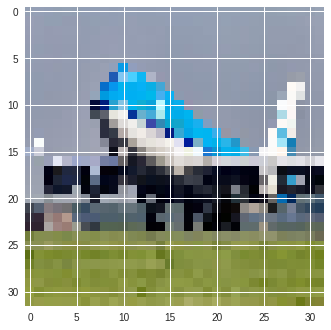

1/1 [==============================] - 0s 105ms/step
airplane = 100.0
automobile = 0.0
bird = 0.0
cat = 0.0
deer = 0.0
dog = 0.0
forg = 0.0
horse = 0.0
ship = 0.0
truck = 0.0
---
予測した結果= airplane


In [0]:
# OpenCVを使って画像を読み込む
im = cv2.imread('test-plane.jpg')

# 色空間を変換してリサイズ
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.resize(im, (32, 32))
plt.imshow(im)
plt.show()

# 予測する
r = model.predict(np.array([im]), batch_size=32, verbose=1)
res = r[0]

# 結果を表示する
for i, acc in enumerate(res):
  print(labels[i], "=", float(acc * 100))
print("---")  
print("予測した結果=", labels[res.argmax()])

In [0]:
model.save('cifar10-cnn-model.h5')

from google.colab import files
files.download('cifar10-cnn-model.h5')

In [0]:
from keras.datasets import cifar10

import numpy as np
import keras

from sklearn.model_selection import train_test_split
from keras.layers.normalization import BatchNormalization

random_state = 42

In [0]:
from google.colab import files
uploaded = files.upload()

In [0]:
# 写真データの読み込み
photos = np.load('photos.npz')

photo_x = photos['x']
photo_y = photos['y']

In [0]:
photo_X = photo_x.astype('float32') / 255
photo_y = np.eye(10)[photo_y.astype('int32').flatten()]

train_X, test_X, train_y, test_y = train_test_split(
    photo_X, photo_y, test_size=20, random_state=random_state)
train_X, valid_X, train_y, valid_y = train_test_split(
    train_X, train_y, test_size=20, random_state=random_state)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.callbacks import EarlyStopping

In [0]:
model = Sequential()

# 32x32x3 -> 30x30x64
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',
                 kernel_initializer='he_normal', input_shape=(32, 32, 3)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',
                 kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))  # 28x28x64 -> 14x14x64
model.add(Dropout(0.5))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu',
                 kernel_initializer='he_normal'))  # 14x14x64 -> 12x12x128
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu',
                 kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))  # 12x12x128 -> 5x5x128
model.add(Dropout(0.5))

model.add(Flatten())  # 5x5x16 -> 400
model.add(Dense(120, activation='relu',
                kernel_initializer='he_normal'))  # 400 ->120
# 120 ->84
model.add(Dense(84, activation='relu', kernel_initializer='he_normal'))  
model.add(Dense(10, activation='softmax'))  # 84 ->10

In [0]:
model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer='adam',
    metrics=['accuracy']
)

In [0]:
early_stopping = EarlyStopping(patience=1, verbose=1)
model.fit(x=train_X, y=train_y, batch_size=128, epochs=10, verbose=1,
          validation_data=(test_X, test_y), callbacks=[early_stopping])

Train on 160 samples, validate on 20 samples
Epoch 1/10
160/160 [==============================] - 1s 4ms/step - loss: 2.3565 - acc: 0.2188 - val_loss: 1.2211 - val_acc: 0.5000
Epoch 2/10
160/160 [==============================] - 0s 525us/step - loss: 0.9197 - acc: 0.5500 - val_loss: 0.6961 - val_acc: 0.5000
Epoch 3/10
160/160 [==============================] - 0s 494us/step - loss: 0.8181 - acc: 0.5812 - val_loss: 0.6391 - val_acc: 0.5500
Epoch 4/10
160/160 [==============================] - 0s 488us/step - loss: 0.6343 - acc: 0.6562 - val_loss: 0.6249 - val_acc: 0.5000
Epoch 5/10
160/160 [==============================] - 0s 473us/step - loss: 0.8001 - acc: 0.6063 - val_loss: 0.5906 - val_acc: 0.6500
Epoch 6/10
160/160 [==============================] - 0s 457us/step - loss: 0.6114 - acc: 0.6750 - val_loss: 0.4328 - val_acc: 0.9500
Epoch 7/10
160/160 [==============================] - 0s 436us/step - loss: 0.3736 - acc: 0.8563 - val_loss: 0.4811 - val_acc: 0.8000
Epoch 00007: early 

In [0]:
score = model.evaluate(test_X, test_y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4810658097267151
Test accuracy: 0.800000011920929


In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [0]:
labels = ["sushi", "curry", "pizza"]

In [0]:
from google.colab import files
uploaded = files.upload()

Saving test-sushi.jpg to test-sushi (2).jpg


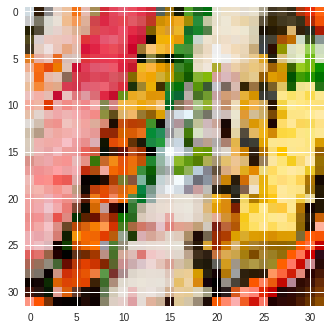

1/1 [==============================] - 0s 8ms/step
画像:sushi 確率:100%


In [0]:
# OpenCVを使って画像を読み込む
im = cv2.imread('test-sushi.jpg')

# 色空間を変換してリサイズ
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.resize(im, (32, 32))
plt.imshow(im)
plt.show()

# 予測する
r = model.predict(np.array([im]), batch_size=32, verbose=1)
res = r[0]

# 結果を表示する
predicted = labels[res.argmax()]
percentage = int(res[res.argmax()] * 100)
print("画像:" + predicted + " 確率:" + str(percentage) + '%')

# CIFAR-10 精度改善

In [0]:
from keras.datasets import cifar10

import numpy as np
import tensorflow as tf
import keras

from sklearn.model_selection import train_test_split
from keras.layers.normalization import BatchNormalization

random_state = 42

In [0]:
(X_train_cifar,y_train_cifar),(X_test_cifar,y_test_cifar)=cifar10.load_data()

In [0]:
X_train = X_train_cifar.astype('float32')
X_test = X_test_cifar.astype('float32')

In [0]:
from keras.utils import to_categorical

y_train_cifar = to_categorical(y_train_cifar)
y_test_cifar = to_categorical(y_test_cifar)

In [10]:
X_train_cifar.shape

(50000, 32, 32, 3)

In [0]:
X_train = X_train_cifar[:40000]
y_train = y_train_cifar[:40000]

X_val = X_train_cifar[40000:]
y_val = y_train_cifar[40000:]

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, Input, Lambda
from keras.callbacks import EarlyStopping

In [0]:
# from keras.preprocessing.image import ImageDataGenerator

In [0]:
# datagen = ImageDataGenerator(
#     width_shift_range=0.2,   # 3.1.1 左右にずらす
#     height_shift_range=0.2,  # 3.1.2 上下にずらす
#     horizontal_flip=True,    # 3.1.3 左右反転
#     samplewise_center=False,
#     samplewise_std_normalization=False,
#     zca_whitening=False)

In [0]:
# datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     channel_shift_range=50,
#     horizontal_flip=True)

In [0]:
# datagen.fit(X_train)

# validationgen = ImageDataGenerator(rescale=1./255)
# validationgen.fit(X_val)

In [0]:
# testdatagen = ImageDataGenerator(rescale=1./255)
# testdatagen.fit(X_test)

In [2]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D,Input

# create the base pre-trained model
base_model = VGG16(weights='imagenet', include_top=False)

Using TensorFlow backend.
W0711 09:20:31.935004 140686558562176 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0711 09:20:31.949734 140686558562176 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0711 09:20:31.953222 140686558562176 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0711 09:20:31.986964 140686558562176 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



58892288/58889256 [==============================] - 2s 0us/step


W0711 09:20:35.469709 140686558562176 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0711 09:20:35.472719 140686558562176 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.



In [0]:
for layer in base_model.layers:
    layer.trainable = False

In [13]:
base_model_output = base_model.output
add_model = GlobalAveragePooling2D()(base_model_output)
add_model = Dense(1024, activation='relu')(add_model)
add_model = Dense(10, activation='softmax')(add_model)

# 転移学習モデル
model = Model(inputs=base_model.input, outputs=add_model)

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [0]:
# add_model = Sequential()

# add_model.add(Lambda(lambda image: tf.image.resize_images(image, (224, 224)),input_shape=(32, 32, 3)))
# add_model.add(Conv2D(64,(3,3), activation='relu'))
# add_model.add(Conv2D(64,(3,3), activation='relu'))
# add_model.add(MaxPooling2D(pool_size=(2,2)))
# add_model.add(Dropout(0.25))

# add_model.add(Conv2D(128,(3,3), activation='relu'))
# add_model.add(Conv2D(128,(3,3), activation='relu'))
# add_model.add(MaxPooling2D(pool_size=(2,2)))
# add_model.add(Dropout(0.25))

# add_model.add(Flatten())
# add_model.add(Dense(256, activation='relu'))
# add_model.add(Dropout(0.5))
# add_model.add(Dense(10, activation='softmax'))

In [0]:
# from keras.applications.vgg16 import VGG16
# from keras.models import Model
# from keras.layers import Dense, GlobalAveragePooling2D,Input

# n_categories = 10

# base_model=VGG16(weights='imagenet'
#                  ,include_top=False
#                  ,input_tensor=Input(shape=(224,224,3)))

# add_model = Sequential()
# add_model.add(Lambda(lambda image: tf.image.resize_images(image, (224, 224)),input_shape=(32, 32, 3)))

# # x=base_model.output
# # x=GlobalAveragePooling2D()(x)
# # x=Dense(1024,activation='relu')(x)
# # prediction=Dense(n_categories,activation='softmax')(x)
# model=Model(inputs=imput_model.input,outputs=base_model.output)




In [0]:
from keras.applications.vgg16 import VGG16

num_classes = 10

model = VGG16(weights='imagenet')
weights = [com.get_weights() for com in model.layers[1:]]

model = Sequential()
model.add(Conv2D(64,(3,3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3), activation='relu'))
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_3 (Lambda)            (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 220, 220, 6)       456       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 110, 110, 6)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 106, 106, 16)      2416      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 53, 53, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 44944)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 120)               5393400   
__________

In [0]:
# weightの転移
model.layers[0].set_weights(weights[0])
model.layers[1].set_weights(weights[1])
model.layers[4].set_weights(weights[3])
model.layers[5].set_weights(weights[4])

In [14]:
model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer='adam',
    metrics=['accuracy']
)

W0711 09:22:15.219367 140686558562176 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [15]:
early_stopping = EarlyStopping(patience=1, verbose=1)
model.fit(x=X_train, y=y_train, batch_size=128, epochs=10, verbose=1,
          validation_data=(X_val, y_val), callbacks=[early_stopping])

W0711 09:22:24.539799 140686558562176 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 19s 471us/step - loss: 4.0313 - acc: 0.5072 - val_loss: 1.4854 - val_acc: 0.5513
Epoch 2/10
40000/40000 [==============================] - 17s 415us/step - loss: 1.1320 - acc: 0.6374 - val_loss: 1.2882 - val_acc: 0.5877
Epoch 3/10
40000/40000 [==============================] - 17s 414us/step - loss: 0.8282 - acc: 0.7213 - val_loss: 1.3177 - val_acc: 0.5939
Epoch 00003: early stopping


In [0]:
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size = 128),
                             steps_per_epoch=len(X_train)/128, validation_data=validationgen.flow(X_val, y_val), validation_steps=len(X_val)/128, epochs = 25)

Epoch 1/25
313/312 [==============================] - 20s 64ms/step - loss: 14.5117 - acc: 0.0997 - val_loss: 14.3895 - val_acc: 0.1040
Epoch 2/25
313/312 [==============================] - 20s 63ms/step - loss: 14.5117 - acc: 0.0997 - val_loss: 14.4788 - val_acc: 0.0985
Epoch 3/25
313/312 [==============================] - 20s 62ms/step - loss: 14.5133 - acc: 0.0996 - val_loss: 14.4729 - val_acc: 0.0989
Epoch 4/25
217/312 [===================>..........] - ETA: 5s - loss: 14.5223 - acc: 0.0990

KeyboardInterrupt: ignored

In [0]:
model.fit_generator(datagen.flow(X_train, y_train, batch_size=100),
                    steps_per_epoch=X_train.shape[0] // 100, epochs=5, validation_data=(X_val, y_val))

Epoch 1/5
400/400 [==============================] - 22s 56ms/step - loss: 14.5119 - acc: 0.0996 - val_loss: 14.4837 - val_acc: 0.1014
Epoch 2/5
 80/400 [=====>........................] - ETA: 15s - loss: 14.5063 - acc: 0.1000

KeyboardInterrupt: ignored

In [0]:
early_stopping = EarlyStopping(patience=1, verbose=1)
model.fit_generator(datagen.flow(train_X, train_y, batch_size=100),
                    steps_per_epoch=train_X.shape[0] // 100, epochs=10, validation_data=(valid_X, valid_y))

RuntimeError: ignored

In [0]:
score = model.evaluate(test_X, test_y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

RuntimeError: ignored

In [0]:
from keras.applications import VGG16

conv_base = VGG16(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)

In [0]:
from keras.applications.vgg16 import VGG16

model = VGG16(weights='imagenet')
weights = [com.get_weights() for com in model.layers[1:]]


model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3))) # 32x32x3 -> 30x30x64
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu')) # 30x30x64 -> 28x28x64
model.add(MaxPooling2D(pool_size=(2, 2))) # 28x28x64 -> 14x14x64

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu')) # 14x14x64 -> 12x12x128
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu')) # 12x12x128 -> 10x10x128
model.add(MaxPooling2D(pool_size=(2, 2))) # 10x10x128 -> 5x5x128

model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [0]:
# weightの初期化
model.layers[0].set_weights(weights[0])
model.layers[1].set_weights(weights[1])
model.layers[3].set_weights(weights[3])
model.layers[4].set_weights(weights[4])

In [0]:
model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer='adam',
    metrics=['accuracy']
)

In [0]:
early_stopping = EarlyStopping(patience=1, verbose=1)
model.fit(x=train_X, y=train_y, batch_size=128, epochs=10, verbose=1,
          validation_data=(valid_X, valid_y), callbacks=[early_stopping])

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 7s 166us/step - loss: 2.1986 - acc: 0.3998 - val_loss: 1.2910 - val_acc: 0.5384
Epoch 2/10
40000/40000 [==============================] - 6s 142us/step - loss: 1.2065 - acc: 0.5757 - val_loss: 1.0907 - val_acc: 0.6168
Epoch 3/10
40000/40000 [==============================] - 6s 141us/step - loss: 1.0265 - acc: 0.6422 - val_loss: 0.9887 - val_acc: 0.6535
Epoch 4/10
40000/40000 [==============================] - 6s 141us/step - loss: 0.9045 - acc: 0.6858 - val_loss: 0.9313 - val_acc: 0.6737
Epoch 5/10
40000/40000 [==============================] - 6s 142us/step - loss: 0.8129 - acc: 0.7177 - val_loss: 0.8488 - val_acc: 0.7061
Epoch 6/10
40000/40000 [==============================] - 6s 142us/step - loss: 0.7254 - acc: 0.7463 - val_loss: 0.8221 - val_acc: 0.7204
Epoch 7/10
40000/40000 [==============================] - 6s 141us/step - loss: 0.6629 - acc: 0.7693 - val_loss: 0.8109 - 